<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
مبانی بینایی 3 بعدی (پاییز 1402)
        </font>
		<p></p>
        <h1 style="text-align: center">
        تمرین اول - بخش عملی
        </h1>
		<h2 style="text-align: center">
		<br>
		<br>
		</h2>		 
		</h3>
            
  

<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 1
        </font>
		<p></p>
		<hr>
       الف- ماتریس زیر را در نظر بگیرید، با استفاده از کتابخانه‌های موجود یک 2D DFT بر روی آن اعمال کنید و به فضای فرکانس ببرید و نتیجه را چاپ نمایید.
	   <br>
	</font>
</div>

In [10]:
import numpy as np

matrix = np.array([[3,4,-3,1,2],
              [6,5,-4,8,-6],
              [-7,1,5,7,9],
              [-9,-2,5,6,3],
              [9,6,8,-2,5]])


# TODO
dft_matrix = np.fft.fft2(matrix)

print("Original Matrix:\n", matrix)
print("\nDiscrete Fourier Transform:\n", dft_matrix)



Original Matrix:
 [[ 3  4 -3  1  2]
 [ 6  5 -4  8 -6]
 [-7  1  5  7  9]
 [-9 -2  5  6  3]
 [ 9  6  8 -2  5]]

Discrete Fourier Transform:
 [[ 60.         +0.j         -14.73606798 +4.33901075j
  -10.26393202 -9.1472939j  -10.26393202 +9.1472939j
  -14.73606798 -4.33901075j]
 [  3.2532889  +9.11453775j  40.08610463-11.63719218j
  -10.        -14.49036173j  40.02379874 +8.75126649j
   29.53444185+16.6497449j ]
 [-15.7532889 +21.40502748j -12.52379874+19.86618572j
  -32.58610463 -4.56352474j   0.46555815-12.05346401j
  -10.         -6.3268805j ]
 [-15.7532889 -21.40502748j -10.         +6.3268805j
    0.46555815+12.05346401j -32.58610463 +4.56352474j
  -12.52379874-19.86618572j]
 [  3.2532889  -9.11453775j  29.53444185-16.6497449j
   40.02379874 -8.75126649j -10.        +14.49036173j
   40.08610463+11.63719218j]]


<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
       ب- بدون استفاده از کتابخانه‌های آماده خودتان تابع تبدیل فوریه را بنویسید و تصویر 1.jpg را به فضای فوریه ببرید و نتیجه را چاپ کنید.
</font> 
</div>

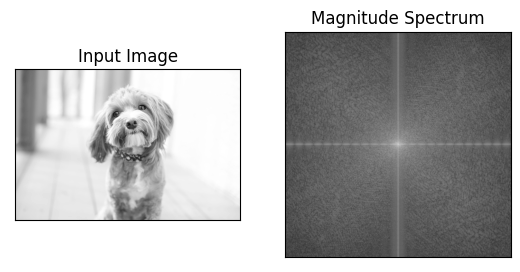

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(r'1.jpg', 0)


#2D FFT using 1D FFT
def fft2D(img):
    img = np.array(img, dtype=complex)
    for i in range(img.shape[0]):
        img[i, :] = fft1D(img[i, :])

    for j in range(img.shape[1]):
        img[:, j] = fft1D(img[:, j])
    return img

##fft 2D
def fft1D(p):
    n = len(p)
    if n == 1:
        return p
    w = np.exp(-2j * np.pi / n)
    y_even = fft1D(p[::2])
    y_odd = fft1D(p[1::2])
    y = np.concatenate([y_even[:n//2] + w ** np.arange(n // 2) * y_odd[:n//2], y_even[:n//2] - w ** np.arange(n // 2) * y_odd[:n//2]])
    return y


#zero padding to next power of 2
next_pow2_horizontal = int(np.ceil(np.log2(img.shape[0])))
next_pow2_vertical = int(np.ceil(np.log2(img.shape[1])))
zero_padded = np.zeros((2**next_pow2_horizontal, 2**next_pow2_vertical))
zero_padded[:img.shape[0], :img.shape[1]] = img

magnitude_spectrum = np.log(np.abs(np.fft.fftshift(fft2D(zero_padded))))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 2
        </font>
		<p></p>
		<hr>
       فیلترهای فضایی Smooth کردن تصویر شامل Gaussian Blur, Average Pooling و Low pass filter را خودتان پیاده سازی کرده و بر روی تصویر 2.png اعمال کنید.
	   <br>
	</font>
</div>

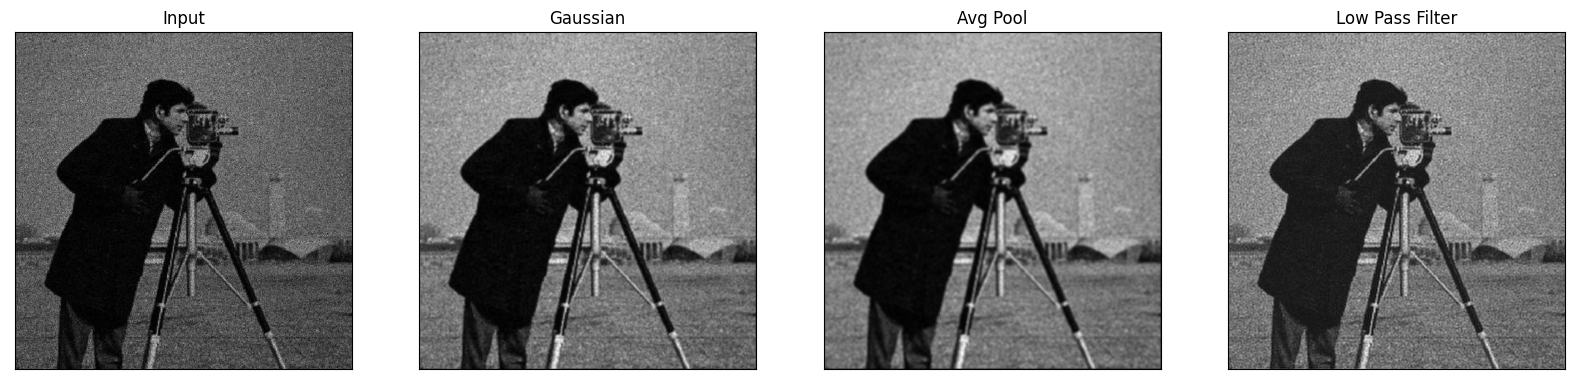

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('2.png', cv2.IMREAD_GRAYSCALE)

def conv2D(img, kernel):
    output_img = np.zeros(img.shape)
    img = np.pad(img, (kernel.shape[0]//2, kernel.shape[1]//2), 'constant')
    for i in range(output_img.shape[0]):
        for j in range(output_img.shape[1]):
            output_img[i, j] = np.sum(img[i:i+kernel.shape[0], j:j+kernel.shape[1]] * kernel)
    return output_img
            

sigma = 1
kernel_size = 5
x, y = np.meshgrid(np.linspace(-(kernel_size//2), kernel_size//2, kernel_size), np.linspace(-(kernel_size//2), kernel_size//2, kernel_size))
guaussian_kernel = 1/(2*np.pi*sigma**2)*np.exp(-((x**2+y**2)/(2*sigma**2)))
gaussian_img = conv2D(img, guaussian_kernel)

average_kernel = np.ones((kernel_size, kernel_size))/(kernel_size*kernel_size)
avg_pool_img = conv2D(img, average_kernel)

low_pas_radius = img.shape[0] // 4
fft_img = np.fft.fftshift(np.fft.fft2(img))
for i in range(fft_img.shape[0]):
    for j in range(fft_img.shape[1]):
        if np.sqrt((i - fft_img.shape[0] // 2) ** 2 + (j - fft_img.shape[1] // 2) ** 2) > low_pas_radius:
            fft_img[i, j] = 0
filtered_image = np.fft.ifft2(np.fft.ifftshift(fft_img)).real

plt.figure(figsize=(20, 5))  

plt.subplot(141),plt.imshow(img, cmap = 'gray')
plt.title('Input'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(gaussian_img, cmap = 'gray')
plt.title('Gaussian'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(avg_pool_img, cmap = 'gray')
plt.title('Avg Pool'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(filtered_image, cmap='gray')
plt.title('Low Pass Filter'), plt.xticks([]), plt.yticks([])
plt.show()


<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 3
        </font>
		<p></p>
		<hr>
       تصویر 3.jpg را از ورودی گرفته و تبدیل‌های HSV و YCbCr را بر روی تصاویر اعمال کرده و در خروجی نشان دهید.
	   <br>
	</font>
</div>

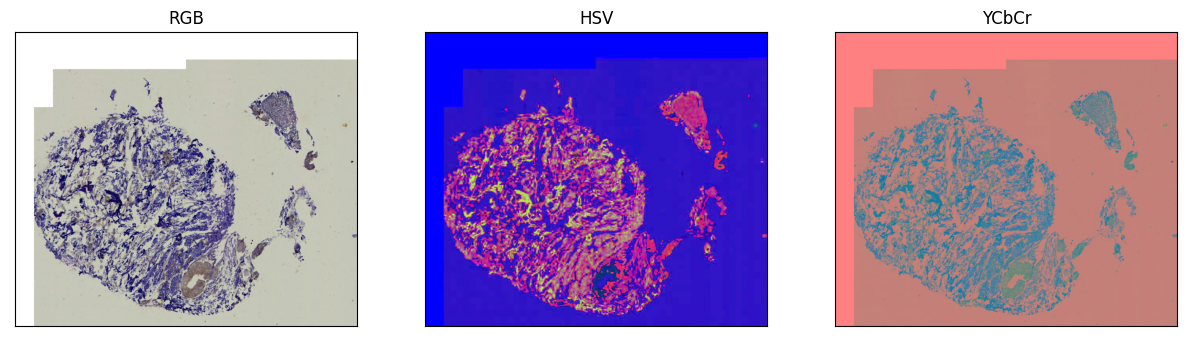

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('3.jpg')
img = img[:, :, ::-1]
img = img.astype(np.int64)
V = img.max(axis=2)
min_img = img.min(axis=2)
H = np.zeros(V.shape)
S = np.zeros(V.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if V[i, j] == min_img[i, j]:
            H[i, j] = 0
        elif V[i, j] == img[i, j, 0]:
            H[i, j] = 60 * (img[i, j, 1] - img[i, j, 2]) / (V[i, j] - min_img[i, j])
        elif V[i, j] == img[i, j, 1]:
            H[i, j] = 120 + 60 * (img[i, j, 2] - img[i, j, 0]) / (V[i, j] - min_img[i, j])
        elif V[i, j] == img[i, j, 2]:
            H[i, j] = 240 + 60 * (img[i, j, 0] - img[i, j, 1]) / (V[i, j] - min_img[i, j])
        if H[i, j] < 0:
            H[i, j] += 360
        S[i, j] = (V[i, j] - min_img[i, j]) / V[i, j] if V[i, j] != 0 else 0

H = H * 255 / 360
S = S * 255
hsv_img = np.dstack((H, S, V)).astype(np.int64)

delta = 128
Y = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]
Cr = (img[:, :, 0] - Y) * 0.713 + delta
Cb = (img[:, :, 2] - Y) * 0.564 + delta
ycbcr_img = np.dstack((Y, Cr, Cb)).astype(np.int64)

plt.figure(figsize=(15, 5))  

plt.subplot(131),plt.imshow(img)
plt.title('RGB'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(hsv_img, cmap = 'gray')
plt.title('HSV'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(ycbcr_img, cmap = 'gray')
plt.title('YCbCr'), plt.xticks([]), plt.yticks([])
plt.show()


<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 4
        </font>
		<p></p>
		<hr>
       تصویر 3.jpg را از ورودی گرفته و پس از حذف نویزهای نمک و فلفلی از روی تصویر، بک‌گراند تصویر را حذف کنید. (دقت کنید که بک‌گراند شامل بخش‌های سفیدرنگ و بخش‌های کرمی‌رنگ می‌باشد.)
	   <br>
	</font>
</div>

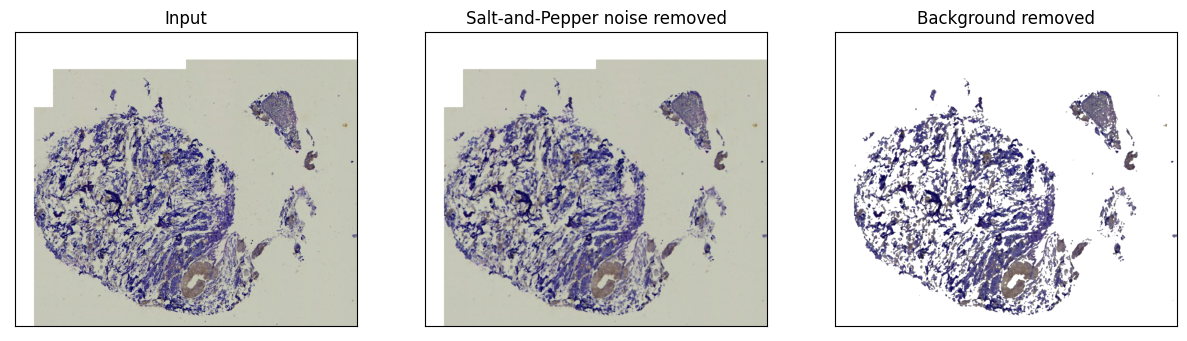

In [20]:
img = cv2.imread('3.jpg')
img = img[:, :, ::-1]
img = img.astype(np.int64)

##remove salt and pepper noise
kernel_size = 3
median_img = np.zeros(img.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        for k in range(img.shape[2]):
            median_img[i, j, k] = np.median(img[max(0, i - kernel_size//2):min(img.shape[0], i + kernel_size // 2 + 1), max(0, j - kernel_size // 2):min(img.shape[1], j + kernel_size // 2 + 1), k])
median_img = median_img.astype(np.uint8)
##create grayscale
grayscale_img = 0.299 * median_img[:, :, 0] + 0.587 * median_img[:, :, 1] + 0.114 * median_img[:, :, 2]

##remove background
mask = np.zeros(grayscale_img.shape)
threshold = 150
mask[grayscale_img < threshold] = 1
mask = np.dstack((mask, mask, mask))
output_img = mask * median_img
for i in range(output_img.shape[0]):
    for j in range(output_img.shape[1]):
        if output_img[i, j, 0] == 0 and output_img[i, j, 1] == 0 and output_img[i, j, 2] == 0:
            output_img[i, j, :] = [255, 255, 255]
output_img = output_img.astype(np.uint8)
plt.figure(figsize=(15, 5))  

plt.subplot(131),plt.imshow(img)
plt.title('Input'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(median_img)
plt.title('Salt-and-Pepper noise removed'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(output_img)
plt.title('Background removed'), plt.xticks([]), plt.yticks([])
plt.show()